# Stock Market Analysis Using YFinance

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

Collecting Data Using YFinance API for Microsoft

In [2]:
data = yf.Ticker("MSFT")

### Basic Data Exploration for Microsoft and Apple Stocks

In [3]:
data.calendar

{'Dividend Date': datetime.date(2025, 6, 12),
 'Ex-Dividend Date': datetime.date(2025, 5, 15),
 'Earnings Date': [datetime.date(2025, 7, 29), datetime.date(2025, 8, 2)],
 'Earnings High': 3.57,
 'Earnings Low': 3.29625,
 'Earnings Average': 3.37256,
 'Revenue High': 74464996940,
 'Revenue Low': 72570000000,
 'Revenue Average': 73791143820}

In [4]:
data.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 

In [5]:
data = yf.download(['MSFT'], period='1mo')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [6]:
df = pd.DataFrame(data)

In [7]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2025-04-21,358.461914,363.812108,355.018254,362.155146,20807300
2025-04-22,366.147827,367.096068,359.200559,362.714128,19485000
2025-04-23,373.703949,379.692954,372.336434,375.370872,20545500
2025-04-24,386.590271,387.738188,374.502477,375.011552,22232300
2025-04-25,391.131958,391.441388,383.895243,386.290839,18973200


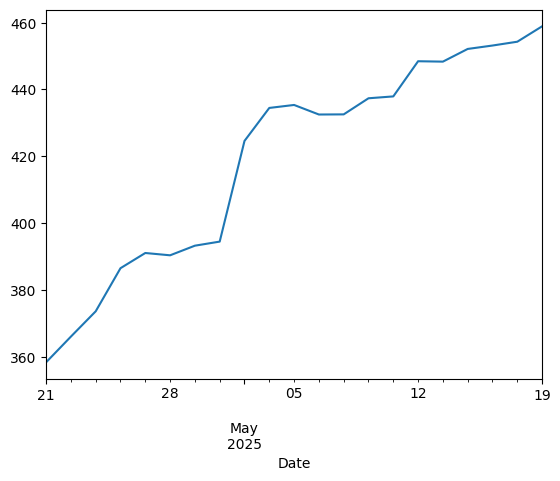

In [132]:
df['Close']['MSFT'].plot()
plt.show()

In [9]:
data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')

[*********************100%***********************]  1 of 1 completed


In [10]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620865,72.681312,71.373241,71.627115,135480400
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800
2020-01-06,72.487869,72.526556,70.783271,71.034732,118387200
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


#### Stock Price Graph for Apple Inc

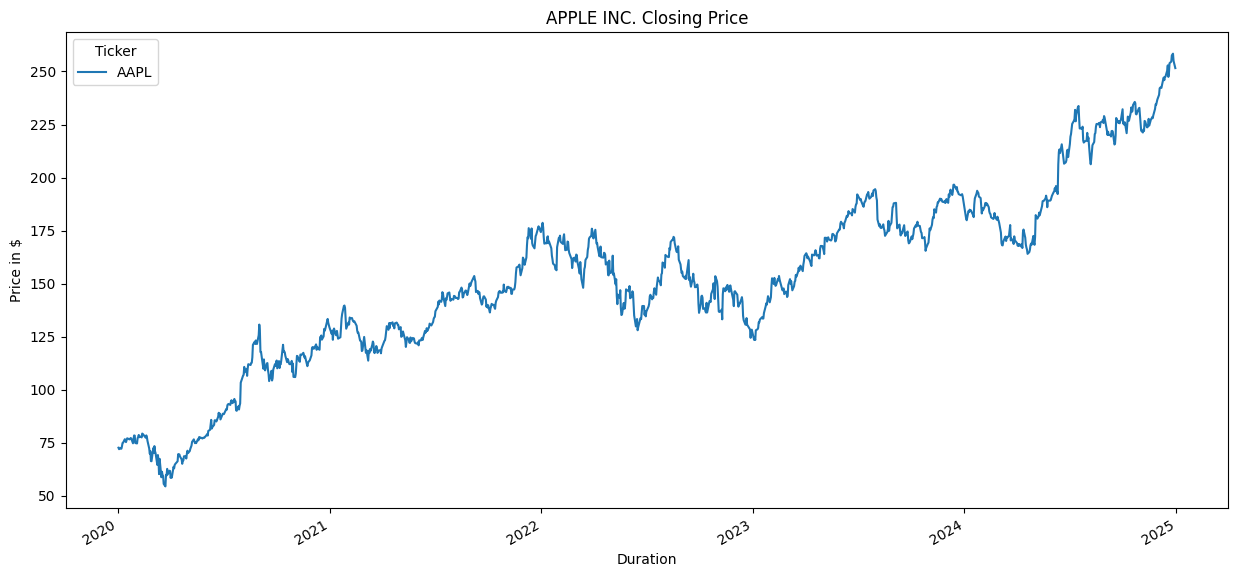

In [135]:
data['Close'].plot(title="APPLE INC. Closing Price", figsize=(15, 7))
plt.ylabel("Price in $")
plt.xlabel("Duration")
plt.show()

#### 20Day and 50Day Moving Average for Apple Inc

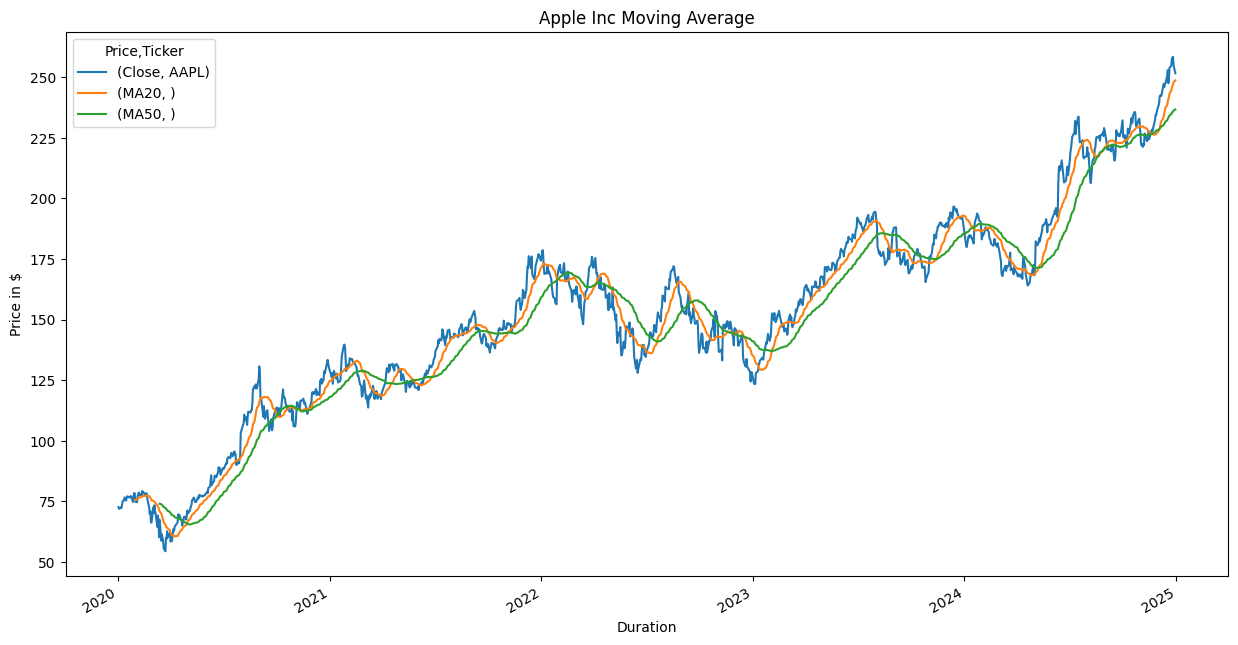

In [133]:
data['MA20'] = data['Close']['AAPL'].rolling(window=20).mean()
data['MA50'] = data['Close']['AAPL'].rolling(window=50).mean()

data[['Close', 'MA20', 'MA50']].plot(title="Apple Inc Moving Average", figsize=(15, 8), xlabel="Duration", ylabel="Price in $")
plt.show()


In [13]:
data_weekly = data['Close']['AAPL'].resample("W").last()

In [14]:
data_weekly = pd.DataFrame(data_weekly)

In [15]:
weekly = data_weekly["AAPL"]
weekly = pd.DataFrame(weekly)
weekly.rename(columns={'AAPL':"Weekly Close"}, inplace=True)
weekly

,Weekly Close
Date,
2020-01-05,71.914810
2020-01-12,75.033852
2020-01-19,77.064880
2020-01-26,76.963356
2020-02-02,74.835609
...,...
2024-12-08,242.255600
2024-12-15,247.532883
2024-12-22,253.877594


In [16]:
weekly["Weekly Return"] = weekly["Weekly Close"].pct_change()

In [17]:
weekly.reset_index(inplace=True)
weekly.head()

,Date,Weekly Close,Weekly Return
0,2020-01-05,71.914810,NaN
1,2020-01-12,75.033852,0.043371
2,2020-01-19,77.064880,0.027068
3,2020-01-26,76.963356,-0.001317
4,2020-02-02,74.835609,-0.027646


#### Calculating Weekly returns for Apple Inc

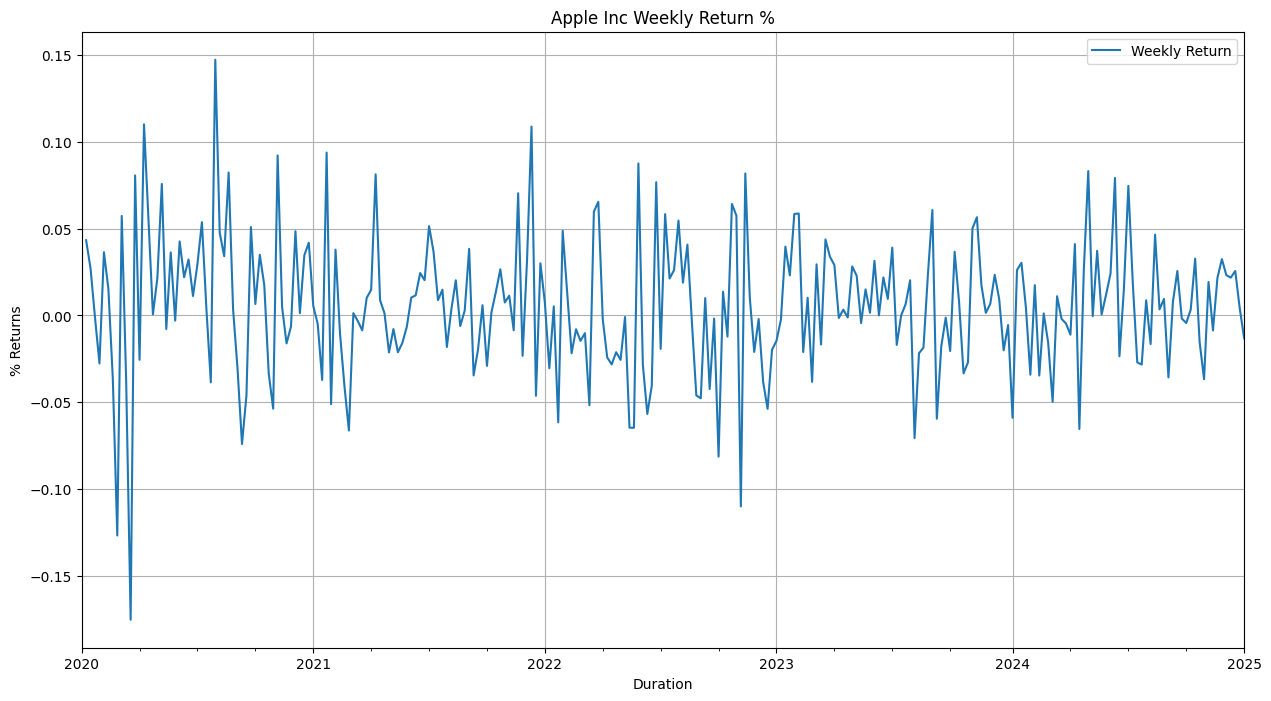

In [19]:
weekly.plot('Date', 'Weekly Return', title='Apple Inc Weekly Return %', figsize=(15,8), xlabel='Duration', ylabel='% Returns')
plt.grid(True)
plt.show()

In [20]:
data.head()

Price,Close,High,Low,Open,Volume,MA20,MA50
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2020-01-02,72.620865,72.681312,71.373241,71.627115,135480400,NaN,NaN
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800,NaN,NaN
2020-01-06,72.487869,72.526556,70.783271,71.034732,118387200,NaN,NaN
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000,NaN,NaN
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200,NaN,NaN


#### Analysing Volume change for the duration

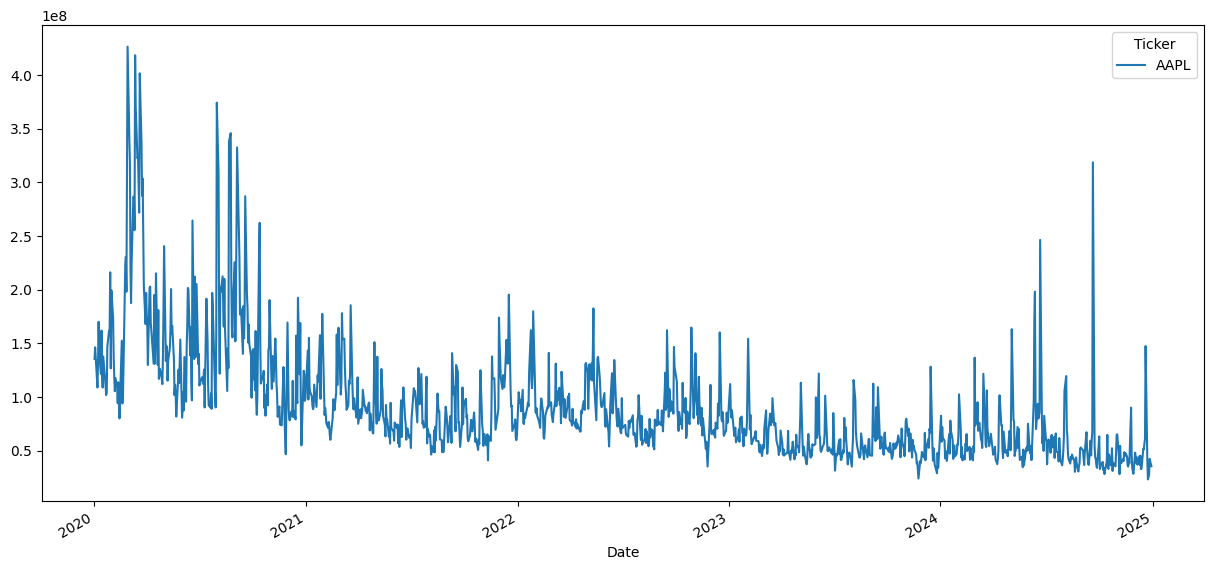

In [136]:
data['Volume'].plot(figsize=(15,7))
plt.show()

## Comparison b/w MAANG Companies

#### Data Collection

In [26]:
maang = yf.download('META AAPL AMZN NFLX GOOG', start='2015-01-01', end='2024-12-31')

[*********************100%***********************]  5 of 5 completed


#### Basic Data Exploration

In [27]:
maang.head()

Price           Close                                                 High  \
Ticker           AAPL     AMZN       GOOG       META       NFLX       AAPL   
Date                                                                         
2015-01-02  24.288584  15.4260  26.045290  78.081993  49.848572  24.757338   
2015-01-05  23.604336  15.1095  25.502361  76.827911  47.311428  24.137516   
2015-01-06  23.606556  14.7645  24.911291  75.792786  46.501431  23.866481   
2015-01-07  23.937565  14.9210  24.868610  75.792786  46.742859  24.037535   
2015-01-08  24.857307  15.0230  24.947023  77.813263  47.779999  24.915069   

Price                                                 ...       Open           \
Ticker         AMZN       GOOG       META       NFLX  ...       AAPL     AMZN   
Date                                                  ...                       
2015-01-02  15.7375  26.365888  78.559745  50.331429  ...  24.746230  15.6290   
2015-01-05  15.4190  26.021471  78.878246  49.258572  ...  24.057539  15.3505   
2015-01-06  15.1500  25.616755  77.226026  47.639999  ...  23.668760  15.1120   
2015-01-07  15.0640  25.173524  76.997109  47.421429  ...  23.815377  14.8750   
2015-01-08  15.1570  24.986726  77.863031  47.835712  ...  24.266367  15.0160   

Price                                           Volume                      \
Ticker           GOOG       META       NFLX       AAPL      AMZN      GOOG   
Date                                                                         
2015-01-02  26.253728  78.211388  49.151428  212818400  55664000  28951268   
2015-01-05  25.968368  77.614206  49.258572  257142000  55484000  41196796   
2015-01-06  25.558441  76.867721  47.347141  263188400  70380000  57998800   
2015-01-07  25.161415  76.399925  47.347141  160423600  52806000  41301082   
2015-01-08  24.714268  76.380015  47.119999  237458000  61768000  67071641   

Price                           
Ticker          META      NFLX  
Date                            
2015-01-02  18177500  13475000  
2015-01-05  26452200  18165000  
2015-01-06  27399300  16037700  
2015-01-07  22045300   9849700  
2015-01-08  23961000   9601900  

[5 rows x 25 columns]

In [28]:
maang.describe()

Price         Close                                                      \
Ticker         AAPL         AMZN         GOOG         META         NFLX   
count   2515.000000  2515.000000  2515.000000  2515.000000  2515.000000   
mean      93.994612   101.186108    82.379014   221.157502   335.764342   
std       65.518476    54.133371    44.339807   121.181815   189.513078   
min       20.647459    14.347500    24.444290    73.702637    45.547142   
25%       35.277458    48.394751    46.254169   135.755188   162.064995   
50%       64.509270    94.565002    64.296959   182.231140   331.440002   
75%      150.535988   153.814995   120.379837   279.507675   481.284988   
max      258.396667   232.929993   197.934509   631.608093   936.559998   

Price          High                                                      ...  \
Ticker         AAPL         AMZN         GOOG         META         NFLX  ...   
count   2515.000000  2515.000000  2515.000000  2515.000000  2515.000000  ...   
mean      94.907267   102.357976    83.212489   223.870261   340.570166  ...   
std       66.112100    54.777217    44.820222   122.668740   191.613256  ...   
min       20.951440    14.539500    24.614317    74.478983    46.785713  ...   
25%       35.681945    48.818001    46.495029   137.138673   163.739998  ...   
50%       64.859458    95.550003    64.659236   184.271530   336.299988  ...   
75%      152.267275   155.864250   121.638862   283.872100   487.340012  ...   
max      259.474086   233.000000   202.649131   637.318434   941.750000  ...   

Price          Open                                                      \
Ticker         AAPL         AMZN         GOOG         META         NFLX   
count   2515.000000  2515.000000  2515.000000  2515.000000  2515.000000   
mean      93.906768   101.208901    82.327120   221.057653   335.656401   
std       65.435983    54.157232    44.317747   121.210396   189.442472   
min       20.569758    14.314000    24.548509    73.692695    46.021427   
25%       35.308422    48.577499    46.267358   135.347105   162.875000   
50%       64.267085    94.556000    64.169070   182.181375   331.230011   
75%      150.317842   153.800003   120.394762   277.810646   480.664993   
max      257.568678   232.389999   198.304075   630.430133   933.349976   

Price         Volume                                                          
Ticker          AAPL          AMZN          GOOG          META          NFLX  
count   2.515000e+03  2.515000e+03  2.515000e+03  2.515000e+03  2.515000e+03  
mean    1.171176e+08  7.616560e+07  3.078171e+07  2.288679e+07  8.907086e+06  
std     6.839566e+07  4.061461e+07  1.536777e+07  1.489065e+07  8.018672e+06  
min     2.323470e+07  1.500750e+07  6.809800e+06  4.726100e+06  1.144000e+06  
25%     7.108210e+07  5.073700e+07  2.121800e+07  1.440365e+07  4.271750e+06  
50%     1.003845e+08  6.526200e+07  2.702400e+07  1.922280e+07  6.572000e+06  
75%     1.426222e+08  9.012000e+07  3.569100e+07  2.639385e+07  1.085500e+07  
max     6.488252e+08  4.771220e+08  2.232980e+08  2.323166e+08  1.333875e+08  

[8 rows x 25 columns]

In [29]:
maang.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2015-01-02 to 2024-12-30
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   2515 non-null   float64
 1   (Close, AMZN)   2515 non-null   float64
 2   (Close, GOOG)   2515 non-null   float64
 3   (Close, META)   2515 non-null   float64
 4   (Close, NFLX)   2515 non-null   float64
 5   (High, AAPL)    2515 non-null   float64
 6   (High, AMZN)    2515 non-null   float64
 7   (High, GOOG)    2515 non-null   float64
 8   (High, META)    2515 non-null   float64
 9   (High, NFLX)    2515 non-null   float64
 10  (Low, AAPL)     2515 non-null   float64
 11  (Low, AMZN)     2515 non-null   float64
 12  (Low, GOOG)     2515 non-null   float64
 13  (Low, META)     2515 non-null   float64
 14  (Low, NFLX)     2515 non-null   float64
 15  (Open, AAPL)    2515 non-null   float64
 16  (Open, AMZN)    2515 non-null   float64
 17  (Open, GOOG)   

In [30]:
maang.head()

Price           Close                                                 High  \
Ticker           AAPL     AMZN       GOOG       META       NFLX       AAPL   
Date                                                                         
2015-01-02  24.288584  15.4260  26.045290  78.081993  49.848572  24.757338   
2015-01-05  23.604336  15.1095  25.502361  76.827911  47.311428  24.137516   
2015-01-06  23.606556  14.7645  24.911291  75.792786  46.501431  23.866481   
2015-01-07  23.937565  14.9210  24.868610  75.792786  46.742859  24.037535   
2015-01-08  24.857307  15.0230  24.947023  77.813263  47.779999  24.915069   

Price                                                 ...       Open           \
Ticker         AMZN       GOOG       META       NFLX  ...       AAPL     AMZN   
Date                                                  ...                       
2015-01-02  15.7375  26.365888  78.559745  50.331429  ...  24.746230  15.6290   
2015-01-05  15.4190  26.021471  78.878246  49.258572  ...  24.057539  15.3505   
2015-01-06  15.1500  25.616755  77.226026  47.639999  ...  23.668760  15.1120   
2015-01-07  15.0640  25.173524  76.997109  47.421429  ...  23.815377  14.8750   
2015-01-08  15.1570  24.986726  77.863031  47.835712  ...  24.266367  15.0160   

Price                                           Volume                      \
Ticker           GOOG       META       NFLX       AAPL      AMZN      GOOG   
Date                                                                         
2015-01-02  26.253728  78.211388  49.151428  212818400  55664000  28951268   
2015-01-05  25.968368  77.614206  49.258572  257142000  55484000  41196796   
2015-01-06  25.558441  76.867721  47.347141  263188400  70380000  57998800   
2015-01-07  25.161415  76.399925  47.347141  160423600  52806000  41301082   
2015-01-08  24.714268  76.380015  47.119999  237458000  61768000  67071641   

Price                           
Ticker          META      NFLX  
Date                            
2015-01-02  18177500  13475000  
2015-01-05  26452200  18165000  
2015-01-06  27399300  16037700  
2015-01-07  22045300   9849700  
2015-01-08  23961000   9601900  

[5 rows x 25 columns]

#### Removing the unessary Data

In [ ]:
maang.drop(columns=['High', 'Open'], inplace=True)

In [39]:
maang.drop(columns=['Low'], inplace=True)

### Graphical representation of Stock Movements

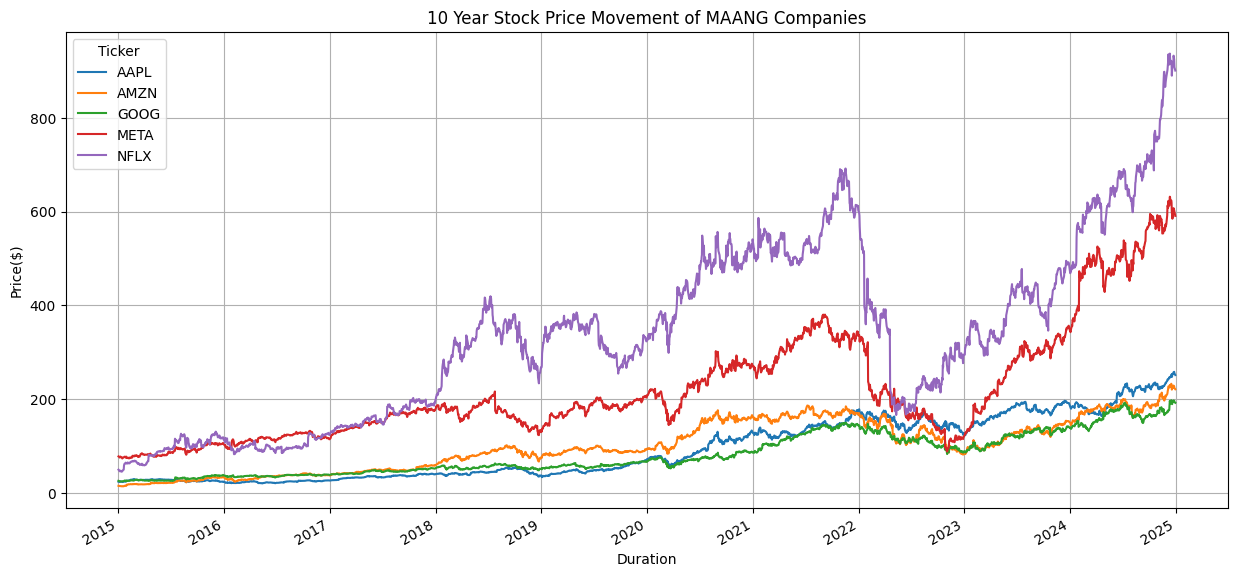

In [46]:
maang['Close'].plot(figsize=(15,7))
plt.xlabel('Duration')
plt.ylabel("Price($)")
plt.title("10 Year Stock Price Movement of MAANG Companies")
plt.grid(True)
plt.show()

#### Volume Change across 10 Years

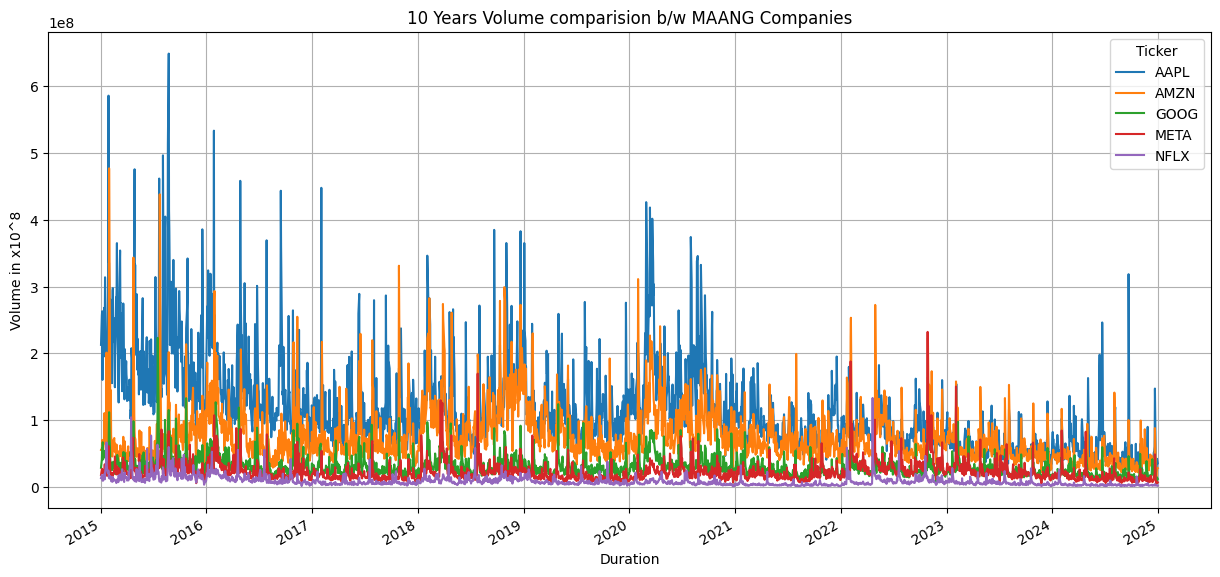

In [49]:
maang['Volume'].plot(figsize=(15,7))
plt.title("10 Years Volume comparision b/w MAANG Companies")
plt.xlabel('Duration')
plt.ylabel("Volume in x10^8")
plt.grid()
plt.show()

In [59]:
maang_yearly = maang['Close'].resample("YE").last()

In [61]:
maang_yearly

Ticker,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2015-12-31,23.782831,33.794498,37.765129,104.169060,114.379997
2016-12-31,26.751024,37.493500,38.409077,114.510323,123.800003
2017-12-31,39.715721,58.473499,52.073353,175.632248,191.960007
2018-12-31,37.574986,75.098503,51.536400,130.475082,267.660004
2019-12-31,71.000877,92.391998,66.535858,204.287201,323.570007
2020-12-31,129.439331,162.846497,87.181076,271.878632,540.729980
2021-12-31,174.287720,166.716995,143.997467,334.772217,602.440002
2022-12-31,128.268478,84.000000,88.311714,119.775490,294.880005
2023-12-31,191.130325,151.940002,140.265640,352.299622,486.880005


#### Annual Stock Returns

In [138]:
round(maang_yearly.pct_change()*100, 2)

Ticker,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN
2016-12-31,12.48,10.95,1.71,9.93,8.24
2017-12-31,48.46,55.96,35.58,53.38,55.06
2018-12-31,-5.39,28.43,-1.03,-25.71,39.44
2019-12-31,88.96,23.03,29.10,56.57,20.89
2020-12-31,82.31,76.26,31.03,33.09,67.11
2021-12-31,34.65,2.38,65.17,23.13,11.41
2022-12-31,-26.40,-49.62,-38.67,-64.22,-51.05
2023-12-31,49.01,80.88,58.83,194.13,65.11


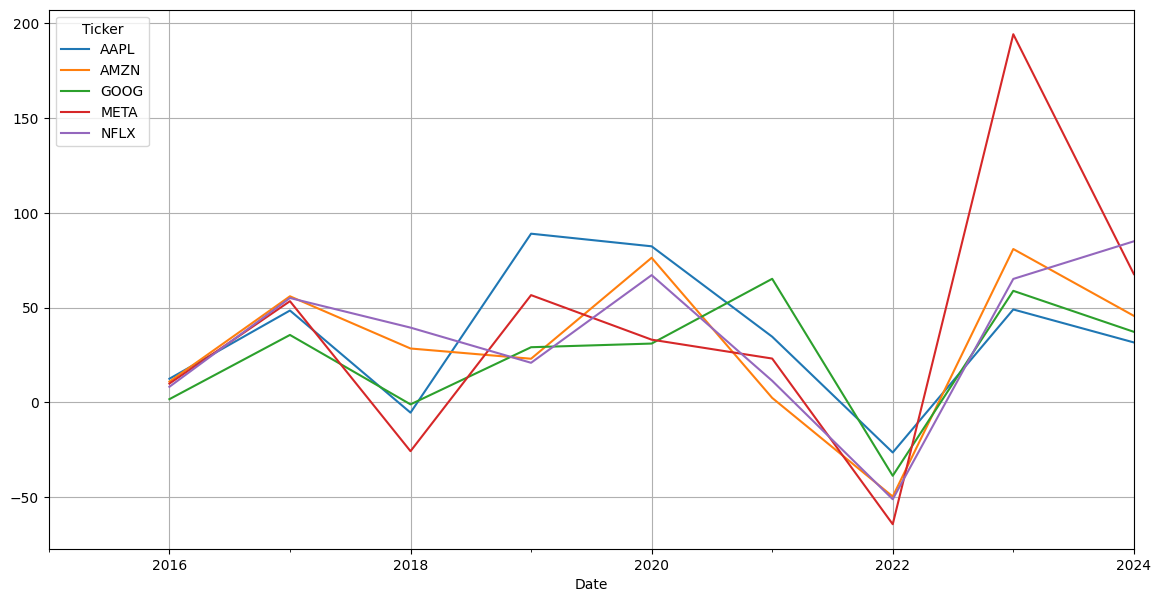

In [150]:
round(maang_yearly.pct_change()*100, 2).plot(figsize=(14, 7))
plt.grid()
plt.show()

### Total Stock Returns

In [79]:
total_returns = ((maang['Close'].iloc[-1]-maang['Close'].iloc[0])/maang['Close'].iloc[0]) * 100

In [83]:
total_returns_df = total_returns.to_frame(name='Total % Return')

In [84]:
total_returns_df

,Total % Return
Ticker,
AAPL,935.849110
AMZN,1334.591003
GOOG,638.984798
META,656.530915
NFLX,1706.330574


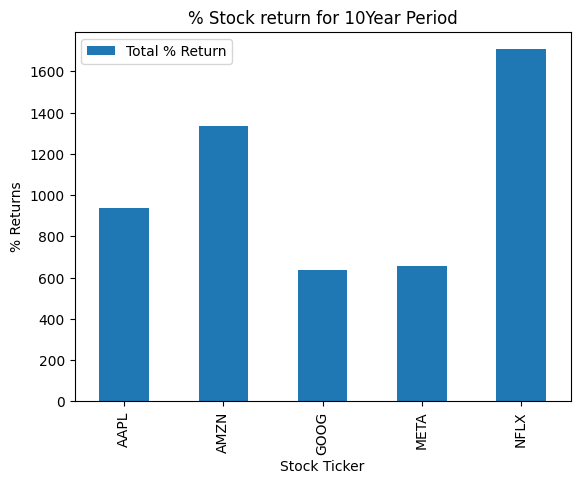

In [146]:
total_returns_df.plot(kind='bar', title="% Stock return for 10Year Period")
plt.ylabel("% Returns")
plt.xlabel('Stock Ticker')
plt.show()

### Calculate and Compare Dividends

Gather Data

In [97]:
maang_all = yf.download('META AAPL AMZN NFLX GOOG', start='2015-01-01', end='2024-12-31', actions=True)

[*********************100%***********************]  5 of 5 completed


In [99]:
maang_div = maang_all['Dividends']

In [ ]:
dividend_sum = maang_div.sum()

Ticker
AAPL    7.6675
AMZN    0.0000
GOOG    0.6000
META    2.0000
NFLX    0.0000
dtype: float64

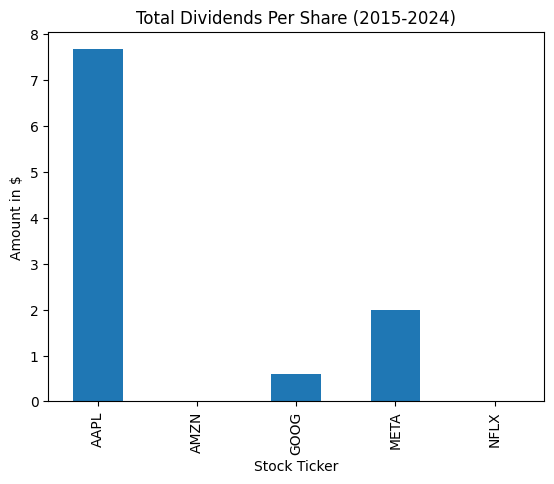

In [131]:
dividend_sum.plot(kind='bar')
plt.title('Total Dividends Per Share (2015-2024)')
plt.ylabel("Amount in $")
plt.xlabel("Stock Ticker")
plt.show()